In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [6]:
df = pd.read_csv("bike_share.csv")

In [7]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.shape

(10886, 11)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [11]:
df.duplicated().sum()

21

In [12]:
df[df.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
190,1,0,0,1,3.28,4.545,53,12.9980,0,1,1
434,1,0,1,2,6.56,11.365,69,0.0000,0,2,2
504,1,0,1,2,5.74,8.335,63,7.0015,0,1,1
554,1,0,0,1,10.66,12.880,60,15.0013,0,1,1
858,1,0,0,1,16.40,20.455,15,22.0028,0,3,3
1185,1,0,1,1,10.66,14.395,65,6.0032,0,1,1
1545,2,0,0,2,14.76,18.180,93,6.0032,0,4,4
4682,4,0,1,1,12.30,16.665,87,0.0000,0,4,4
5089,4,0,1,2,18.86,22.725,87,12.9980,0,3,3
5188,4,0,0,1,9.84,12.880,65,7.0015,1,10,11


In [13]:
df = df.drop_duplicates()

In [14]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029315,-0.008394,0.008603,0.258008,0.264052,0.189819,-0.147440,0.096536,0.163820,0.163241
holiday,0.029315,1.000000,-0.250650,-0.007172,-0.000020,-0.005512,0.002048,0.008190,0.043584,-0.021311,-0.005743
workingday,-0.008394,-0.250650,1.000000,0.033854,0.030122,0.024722,-0.011607,0.014285,-0.319295,0.120018,0.011967
weather,0.008603,-0.007172,0.033854,1.000000,-0.055684,-0.056001,0.406642,0.007071,-0.136453,-0.110057,-0.129427
temp,0.258008,-0.000020,0.030122,-0.055684,1.000000,0.984920,-0.065301,-0.018937,0.466756,0.317530,0.393577
atemp,0.264052,-0.005512,0.024722,-0.056001,0.984920,1.000000,-0.043934,-0.058440,0.461769,0.313697,0.389005
humidity,0.189819,0.002048,-0.011607,0.406642,-0.065301,-0.043934,1.000000,-0.317920,-0.348238,-0.265321,-0.317337
windspeed,-0.147440,0.008190,0.014285,0.007071,-0.018937,-0.058440,-0.317920,1.000000,0.091474,0.089907,0.100212
casual,0.096536,0.043584,-0.319295,-0.136453,0.466756,0.461769,-0.348238,0.091474,1.000000,0.496587,0.690036
registered,0.163820,-0.021311,0.120018,-0.110057,0.317530,0.313697,-0.265321,0.089907,0.496587,1.000000,0.970890


<AxesSubplot:>

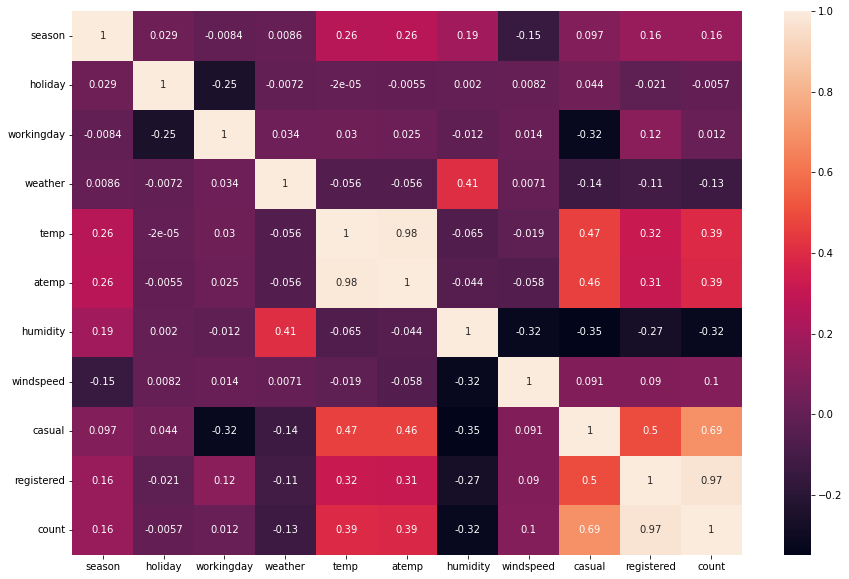

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr,annot=True)


In [19]:
X = df[['season','holiday','workingday','weather','temp','humidity','windspeed']]
Y = df['count']

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [32]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [33]:
train_MSE = mean_squared_error(train_y, predict_train)
test_MSE = mean_squared_error(test_y, predict_test)

In [34]:
print("train_MSE: ",train_MSE)
print("test_MSE: ",test_MSE)


train_MSE:  24050.797935702307
test_MSE:  25051.935058251987


In [36]:
train_MAE = mean_absolute_error(train_y, predict_train)
test_MAE= mean_absolute_error(test_y, predict_test)
print("train_MAE: ",train_MAE)
print("test_MAE: ",test_MAE)

train_MAE:  116.24313137881832
test_MAE:  117.61772665245411


In [37]:
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
train_MAPE = np.mean(np.abs(train_y, predict_train))
test_MAPE = np.mean(np.abs(test_y, predict_test))
print("train_MAPE: ", train_MAPE)
print("test_MAPE: ", test_MAPE)
train_MAPE:  189.4940170940171
test_MAPE:  197.63711656441717
r2_train = r2_score(train_y,predict_train)
r2_test = r2_score(test_y,predict_test)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)

train_MAPE:  189.4940170940171
test_MAPE:  197.63711656441717
r2_train:  1.0
r2_test:  1.0
